In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras


In [2]:
from keras.datasets import mnist

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    print(gpus)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPU


In [4]:
(train_X,train_Y),(test_X,test_Y)=mnist.load_data()

In [5]:
print(train_X.shape,train_Y.shape,test_X.shape,test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


1


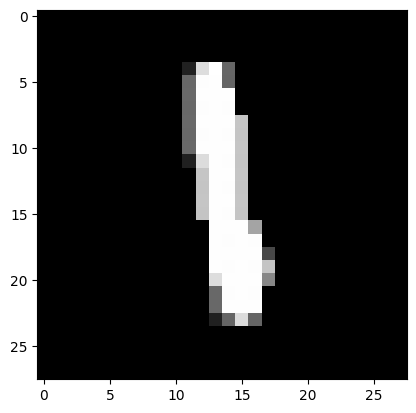

In [6]:
plt.imshow(train_X[200],cmap='Greys_r')
print(train_Y[200])

8


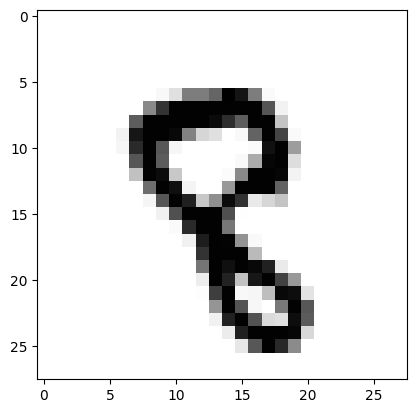

In [7]:
# to convert matrix into image
plt.imshow(train_X[6284],cmap='Greys')
print(train_Y[6284])

In [8]:
# # one hot encoder vector form
# count=0
# for i in train_Y:
#     temp=np.zeros(len(np.unique(train_Y)))
#     temp[i]=1
#     print('on count:',count,'/',train_Y.shape,end='\r')
#     train_Y[count]=temp
#     count+=1
#     # print(temp)
#     # break

In [9]:
print(np.unique(train_Y),len(np.unique(train_Y)))

[0 1 2 3 4 5 6 7 8 9] 10


In [10]:
# count=0
# for i in test_Y:
#     temp=np.zeros(len(np.unique(test_Y)))
#     temp[i]=1
#     print('on count:',count,'/',test_Y.shape,end='\r')
#     # test_Y[count]=np.zeros(len(np.unique(test_Y)))
#     # test_Y[count]=temp
#     count+=1

In [11]:
from tensorflow.keras.utils import to_categorical
train_Y=to_categorical(train_Y)
test_Y=to_categorical(test_Y)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


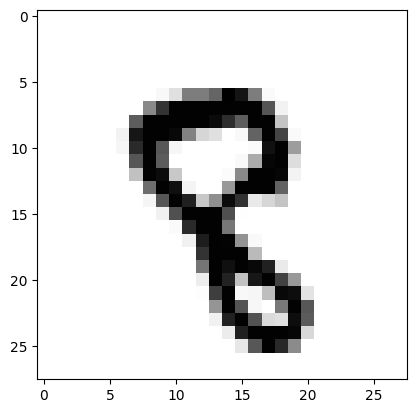

In [12]:
plt.imshow(train_X[6284],cmap='Greys')
print(train_Y[6284])

In [13]:
train_X=train_X/255
test_X=test_X/255

In [14]:
print(train_X.shape,train_Y.shape)
train_X = np.expand_dims(train_X,-1) 
test_X = np.expand_dims(test_X,-1)
print(train_X.shape,train_Y.shape)

(60000, 28, 28) (60000, 10)
(60000, 28, 28, 1) (60000, 10)


In [15]:
# plt.imshow(train_X[6284],cmap='Greys')
print(train_Y[6284])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [16]:
from tensorflow.keras.models import Sequential

In [17]:
img_shape=(28,28,1)

In [18]:
model=Sequential([
    keras.Input(shape=img_shape),
    keras.layers.Conv2D(20,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    keras.layers.MaxPool2D(pool_size=(5,5),strides=(1,1),padding="same"),
    
    keras.layers.Conv2D(40,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    keras.layers.MaxPool2D(pool_size=(5,5),strides=(1,1),padding="same"),
    
    keras.layers.Conv2D(80,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    keras.layers.MaxPool2D(pool_size=(5,5),strides=(1,1),padding="same"),
    
    keras.layers.Conv2D(160,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    keras.layers.MaxPool2D(pool_size=(5,5),strides=(1,1),padding="same"),

    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 40)        7240      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 40)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 80)        28880     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 80)       0

In [20]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall'])

In [21]:
hist=model.fit(train_X,train_Y,batch_size=200,epochs=10,validation_split=0.2)

Epoch 1/10
240/240 [==============================] - 27s 91ms/step - loss: 0.3862 - accuracy: 0.8844 - precision: 0.9505 - recall: 0.8531 - val_loss: 0.0629 - val_accuracy: 0.9812 - val_precision: 0.9835 - val_recall: 0.9793
Epoch 2/10
240/240 [==============================] - 21s 89ms/step - loss: 0.0620 - accuracy: 0.9802 - precision: 0.9825 - recall: 0.9785 - val_loss: 0.0472 - val_accuracy: 0.9846 - val_precision: 0.9864 - val_recall: 0.9837
Epoch 3/10
240/240 [==============================] - 21s 89ms/step - loss: 0.0497 - accuracy: 0.9841 - precision: 0.9860 - recall: 0.9828 - val_loss: 0.0444 - val_accuracy: 0.9859 - val_precision: 0.9876 - val_recall: 0.9850
Epoch 4/10
240/240 [==============================] - 21s 89ms/step - loss: 0.0432 - accuracy: 0.9864 - precision: 0.9876 - recall: 0.9852 - val_loss: 0.0534 - val_accuracy: 0.9852 - val_precision: 0.9867 - val_recall: 0.9838
Epoch 5/10
240/240 [==============================] - 21s 89ms/step - loss: 0.0336 - accuracy: 0

In [22]:
hist.history

{'loss': [0.386249840259552,
  0.06197315827012062,
  0.049695707857608795,
  0.04319040849804878,
  0.033590685576200485,
  0.029909281060099602,
  0.026674695312976837,
  0.028423085808753967,
  0.02289186790585518,
  0.020855654031038284],
 'accuracy': [0.8844166398048401,
  0.9802291393280029,
  0.9840624928474426,
  0.9863749742507935,
  0.988854169845581,
  0.9900624752044678,
  0.9914791584014893,
  0.9907916784286499,
  0.992479145526886,
  0.9930624961853027],
 'precision': [0.9504688382148743,
  0.9825126528739929,
  0.9859546422958374,
  0.9875955581665039,
  0.9898789525032043,
  0.9908823370933533,
  0.9922799468040466,
  0.9914880990982056,
  0.9931594133377075,
  0.9934325814247131],
 'recall': [0.8531249761581421,
  0.9785416722297668,
  0.9827708601951599,
  0.9852499961853027,
  0.9882291555404663,
  0.9894166588783264,
  0.9907708168029785,
  0.9901041388511658,
  0.992104172706604,
  0.9926875233650208],
 'val_loss': [0.06292648613452911,
  0.0471939854323864,
  0.0

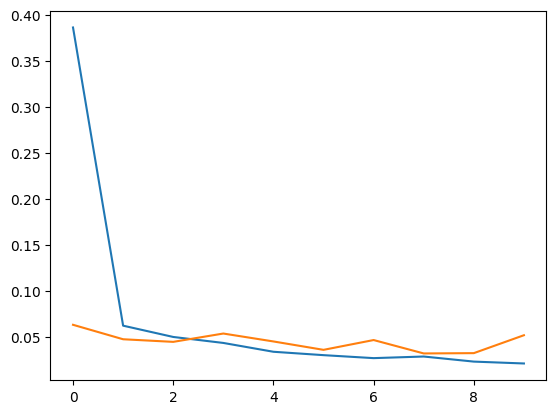

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

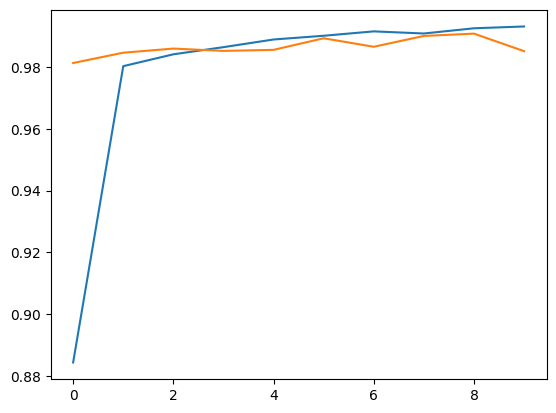

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [25]:
preds=model.evaluate(test_X,test_Y)

313/313 [==============================] - 2s 6ms/step - loss: 0.0439 - accuracy: 0.9876 - precision: 0.9885 - recall: 0.9871


1/1 [==============================] - 0s 28ms/step
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


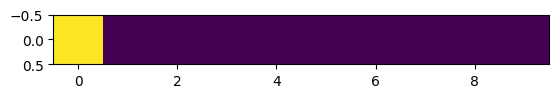

In [26]:
img=model.predict(test_X[101].reshape(1,28,28))
print(np.argmax(model.predict(test_X[101].reshape(1,28,28))))
print(test_Y[101])
plt.imshow(img)

1/1 [==============================] - 0s 33ms/step


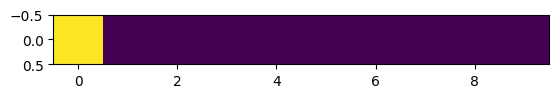

In [27]:
img=model.predict(test_X[101].reshape(1,28,28))
plt.imshow(img)